# Laboratorium 5.
Singular Value Decomposition

## Zadanie 2 - Kompresja obrazu

In [227]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

Wczytanie obrazu i przygotowanie odpowiadającej mu macierzy pikseli.

In [228]:
image = Image.open("image.png").convert("L")
P = np.asarray(image)

Obliczenie SVD macierzy pikseli.

In [229]:
U, S, Vh = np.linalg.svd(P)

Przybliżenie obrazu (low rank approximation) z użyciem różnej liczby k pierwszych wartości osobliwych.

In [230]:
K = [1, 10, 25, 50, 100]
A = [S[:k] * U[:, :k] @ Vh[:k, :] for k in K]

Porównanie wyników.

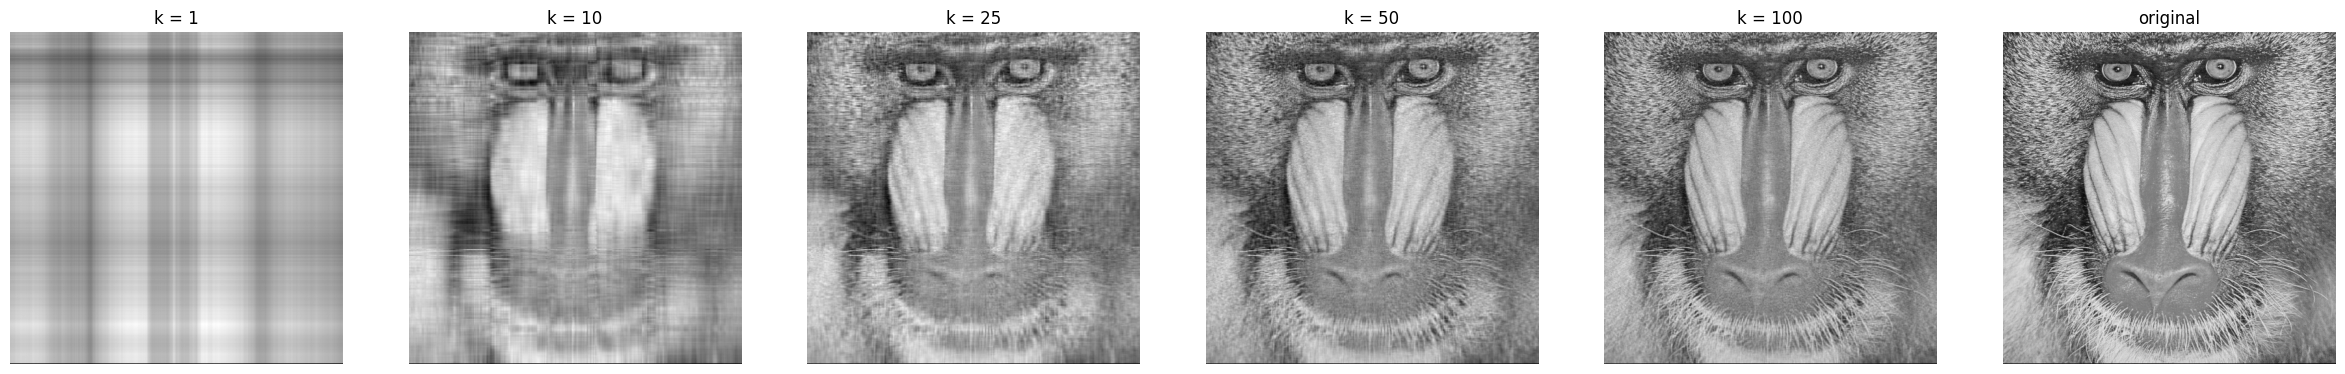

In [231]:
fig, axes = plt.subplots(1, len(A) + 1, figsize=(30, 5))

for i in range(len(A)):
    axes[i].imshow(A[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'k = {K[i]}')

axes[-1].imshow(image, cmap='gray')
axes[-1].axis('off')
axes[-1].set_title(f'original')

plt.show()

[np.float64(21350.873944690273), np.float64(14734.051625237329), np.float64(12701.843081013963), np.float64(10333.392522991273), np.float64(7111.956230591156)]
[1, 10, 25, 50, 100]


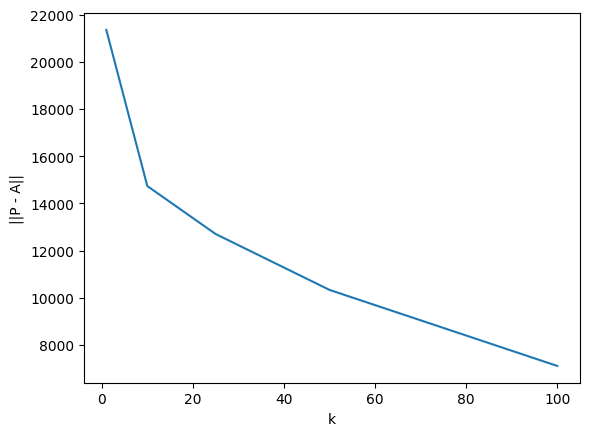

In [232]:
plt.plot(K, [np.linalg.norm(P - Ai) for Ai in A])
plt.xlabel('k')
plt.ylabel('||P - A||')

plt.show()